In [55]:
# In this Jupyter notebook we will fit a nonlinear function to a set of experimental
# data.  The fit will be weighted by the measurement uncertainties.

# In this example, we take data from a series LRC circuit.  For the y-axis
# we will have the ratio of the magntidue of the voltage across the
# resistance to that supplied by the function generator driving the
# circuit.  On the x-axis we will have frequency.

# The process will be very similar to the process used to fit a linear function to
# a dataset.  The main difference will be in the definition of the model function
# that we are fitting to.

# Import the NumPy, Matplotlib and SciPy modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [56]:
# Enter the data as arrays.
Vratio= np.array([0.198e-1, 0.67e-1, .117, .185, .331, .450, .573, .689, .718,\
                  .714, .704, .670, .631, .549, .412, .318, .249, .186, .138])
errVratio= np.array([0.1e-2, 0.2e-2, 0.3e-2, 0.3e-2, 0.5e-2, 0.6e-2, 0.7e-2,\
                     0.8e-2, 0.8e-2, 0.8e-2, 0.8e-2, 0.8e-2, 0.8e-2, 0.7e-2,\
                     0.6e-2, 0.4e-2, 0.5e-2, 0.3e-2, 0.3e-2])
f = np.array([3000, 10000, 15000, 20000, 25000, 28000, 30000, 32000, 33000,\
              34000, 35000, 36000, 37000, 39000, 43000, 47000, 52000, 60000,\
              70000])

In [57]:
# Calculate angular frequency.
omega = (2*np.pi*f)

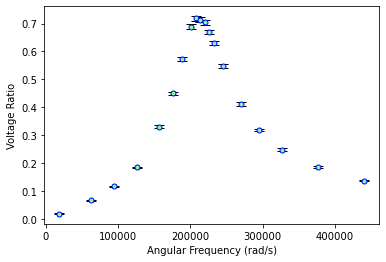

In [58]:
# Plot the data using errorbar(x,y,e).
plt.errorbar(omega, Vratio, errVratio, fmt = 'ko', markersize = 5,\
                 linewidth = 1.8,\
                 markeredgecolor = 'b',\
                 markerfacecolor = (.49, 1, .63),\
                 capsize = 5)
plt.xlabel('Angular Frequency (rad/s)')
plt.ylabel('Voltage Ratio');

In [59]:
# To do the actual fit, we will use the 'curve_fit()' function from the
# 'SciPy' module.  This way of fitting is very nice because we
# use it for all types of fit models (linear, polynomial, line-in-parameter fits,
# and nonlinear fit).  It is capable of doing both unweighted
# and weighted fits and it will return uncertainties in the fit parameters.

# The first step is to define a function for the model that we will fit our
# data to.  In this case, the model is a Lorentzian.

# w0 is the resonance frequency
# A is the amplitude (height of the resonance peak)
# width is the width of the resonance
# x represents the independent variable along the horizontal axis
# (angular frequency in this case)
def LRCFunc(x, A, width, w0):
    y = A/np.sqrt(1+(x/width)**2*(1-(w0/x)**2)**2)
    return y

In [60]:
# Here is the weighted fit of the nonlinear model to the data.
a_fit, cov = curve_fit(LRCFunc, omega, Vratio, sigma = errVratio,\
                       p0 = start, absolute_sigma = True)

In [61]:
# Extract the fit parameters and their uncertainties.
print('The best-fit parameters are:\
      \n A \u00B1 \u0394A =', a_fit[0], '\u00B1', np.sqrt(np.diag(cov))[0],\
     '\n width \u00B1 \u0394width =', a_fit[1], '\u00B1', np.sqrt(np.diag(cov))[1],\
     '\n w0 \u00B1 \u0394w0 =', a_fit[2], '\u00B1', np.sqrt(np.diag(cov))[2])

The best-fit parameters are:      
 A ± ΔA = 0.7243152456809248 ± 0.003647934113877031 
 width ± Δwidth = 66816.88081227308 ± 623.0614968262379 
 w0 ± Δw0 = 213875.00919865974 ± 310.60920671532733


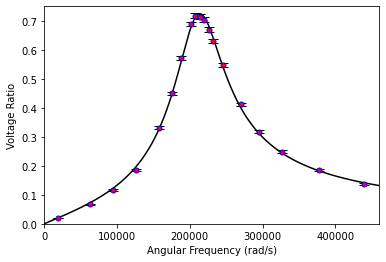

In [62]:
# Plot the data.
plt.figure()
plt.errorbar(omega, Vratio, errVratio, fmt = 'ko', markersize = 5,\
                 linewidth = 1.8,\
                 markeredgecolor = 'b',\
                 markerfacecolor = 'r',\
                 capsize = 5)
plt.xlabel('Angular Frequency (rad/s)')
plt.ylabel('Voltage Ratio')

# Plot the best-fit line.
xx = np.arange(1, 8e5, 100)
plt.plot(xx, LRCFunc(xx, a_fit[0], a_fit[1], a_fit[2]), 'k-')
plt.axis((0, 4.6e5, 0, 0.75));

In [63]:
# Let's try to make our own estimates of the uncertainties in the best-fit parameters
# using the methods discussed in the PHYS 232 lectures.

# Let's give the best-fit parameters some recognizable names.
AStar = a_fit[0]
widthStar = a_fit[1]
w0Star = a_fit[2]

# The first step is to calculate the Chi-Squared value using the best-fit parameters
# which should correspond to the minimum Chi-Squared value (ChiSqZero).  The 'del w'
# notation is used to clear any value previously assigned to w.
ChiSq = 0
for i in range(len(Vratio)):
    w = omega[i]
    ChiSq = ChiSq + ((Vratio[i] - LRCFunc(w, AStar, widthStar, w0Star))/errVratio[i])**2
ChiSqZero = ChiSq
print(ChiSqZero)
del w

48.14520250462778


In [64]:
# The next step is to vary one of the parameters away from the value that minmizes
# ChiSq to see how ChiSq depends on the paramter value.  We expect this variation
# to result in a quadratice dependence.  As an example, we'll try finding the
# uncertainty in the resonance frequency w0.  Note, however, the same procedure
# can be applied to each of the parameters (A, width, w0).

# First, pick a suitable step size by which to vary w0.  This may require some
# trail and error.
w0step = 5e2

In [65]:
# Now use nested loops to recalculate ChiSq at many values of w0 that bracket
# the best-fit value a_fit[2]
steps = 500
ChiSqList = []
w0List = []
for i in range(steps):
    w0 = w0Star + (i - steps/2)*w0step 
    w0List = w0List + [w0]
    ChiSq = 0
    for j in range(len(Vratio)):
        w = omega[j]
        ChiSq = ChiSq + ((Vratio[j] - LRCFunc(w, AStar, widthStar, w0))/errVratio[j])**2
    ChiSqList = ChiSqList + [ChiSq]
    del w

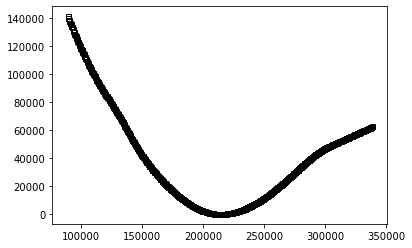

In [66]:
# Plot the ChiSq value as a function of w0.
plt.plot(w0List, ChiSqList, 'ks', linewidth = 2.5, markersize = 5, fillstyle = 'none');

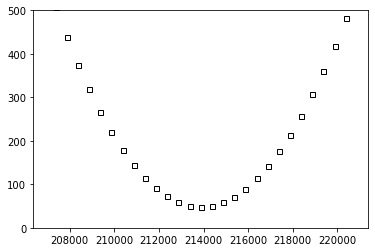

In [67]:
# Zoom in near the miniumum to see the quadratic shape near the best-fit value w0Star.
plt.plot(w0List, ChiSqList, 'ks', linewidth = 2.5, markersize = 5, fillstyle = 'none')
plt.axis((w0Star - 15*w0step, w0Star + 15*w0step, 0, 500));

In [68]:
# The last step is to characterize the shape of the quadratic dependence:

# ChiSq = ChiSqZero + B*(w0 - w0Star)**2

# There are three unknowns (ChiSqZero, B, and w0Star).  These could be determined
# by fitting the data above to a quadratic finction.  Alternatively, if we pick
# three values of w0 near the minimum, we can use the corresponding ChiSq values
# determine the unknowns.
ChiSq1 = ChiSqList[244]
ChiSq2 = ChiSqList[247]
ChiSq3 = ChiSqList[250]
dw0 = w0List[250] - w0List[247]

In [69]:
# The value of w0 that minimizes ChiSq (w0min) is given below as is the
# uncertainty in w0min which is determined by how quickly ChiSq increases
# as we move away from w0min.  That is, errw0 is determined by the B
# coefficient in the quadratic depedence of ChiSq on w0.  The larger the
# value of B, the lower the errw0.
w0min = w0List[250] - dw0*((ChiSq3 - ChiSq2)/(ChiSq1 - 2*ChiSq2 + ChiSq3) + 1/2)
errw0 = np.sqrt(2)*dw0/np.sqrt(ChiSq1 - 2*ChiSq2 + ChiSq3)
ChiSqZeroFit = ChiSq3 - (w0List[250] - w0min)**2/errw0**2
print('w0min =', w0min)
print('\u0394w0 =', errw0)
print('ChiSqZero =', ChiSqZeroFit)

w0min = 213865.68039978252
Δw0 = 304.59089220406986
ChiSqZero = 48.14426447267113


In [ ]:
# Notice that the extracted value for the uncertainty in w0 is very similar to the value 
# reported by the 'curve_fit' routine from the scipy.optimize module.

# In general, extracting uncertainties in the fit parameters from a nonlinwar fit is
# nontrivial.  Above we have given one method for obtaining an estimate if the 
# uncertainties in the fit parameters.  For more details about uncertainties for
# nonlinear fits, see Data Reduction and Error Analysis by Bevington and Robinson
# and/or Numerical Receipes in C which you cna obtain and read fro free by visiting
# http://www.nrbook.com/a/bookcpdf.php.